In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
train_set= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv') 
test_set= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [3]:
df=pd.concat([train_set,test_set])

In [4]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
X=df.drop("label",axis=1)
y=df['label']

In [6]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'count')

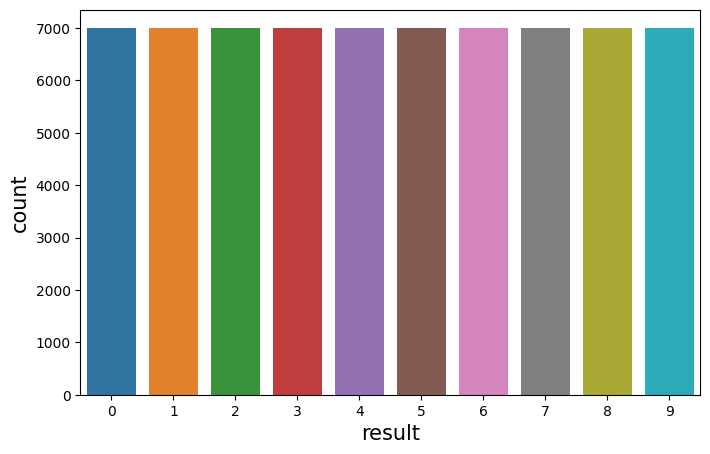

In [7]:
import numpy as np 
import pandas as pd
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

pot_lbl = y.value_counts()

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('result', fontsize=15)
plt.ylabel('count', fontsize=15)

In [8]:
X=X/255.0

In [9]:
# Split the DataFrame into training, testing, and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)


In [10]:
# Print the shapes of the training, testing, and validation sets
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (49000, 784)
Testing data: (21000, 784)


In [11]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
X_train[0].shape

(28, 28, 1)

In [14]:
X_test[0].shape

(28, 28, 1)

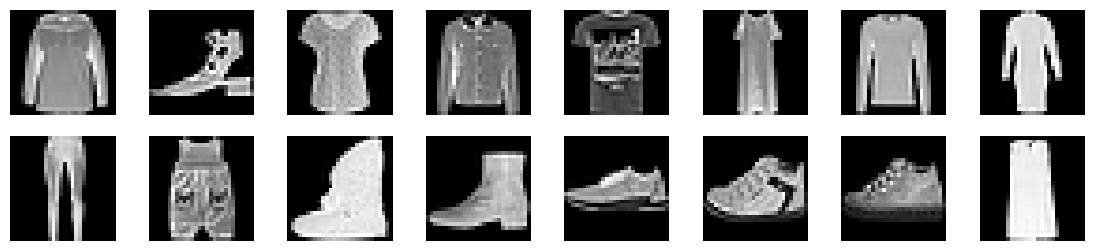

In [15]:
fig, ax = plt.subplots(ncols=8, nrows=2, figsize=(14, 3))
n = 0
for i in range(2):
    for j in range(8):
        ax[i][j].imshow(X_train[n], cmap='gray')
        ax[i][j].axis(False)
        n += 1
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

height,width = 28,28
channels=1
num_classes=10
# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a dense layer for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 128)       

In [24]:
# Train the model using your dataset
num_epochs=20
batch_size=32
history=model.fit(X_train,y_train, epochs=num_epochs, batch_size=batch_size,validation_data=(X_test, y_test))

Epoch 1/20
1532/1532 [==============================] - 11s 5ms/step - loss: 0.6278 - accuracy: 0.7696 - val_loss: 0.4631 - val_accuracy: 0.8288
Epoch 2/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.4069 - accuracy: 0.8513 - val_loss: 0.4063 - val_accuracy: 0.8530
Epoch 3/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.3472 - accuracy: 0.8724 - val_loss: 0.3252 - val_accuracy: 0.8810
Epoch 4/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.3113 - accuracy: 0.8857 - val_loss: 0.3415 - val_accuracy: 0.8746
Epoch 5/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.2859 - accuracy: 0.8961 - val_loss: 0.3125 - val_accuracy: 0.8864
Epoch 6/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.2637 - accuracy: 0.9025 - val_loss: 0.3659 - val_accuracy: 0.8731
Epoch 7/20
1532/1532 [==============================] - 8s 5ms/step - loss: 0.2405 - accuracy: 0.9108 - val_loss: 0.3237 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


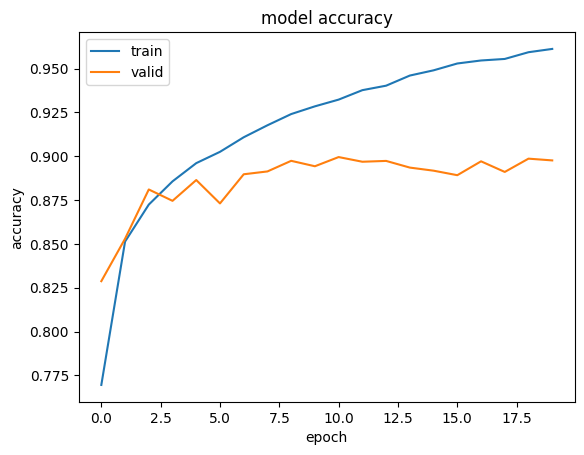

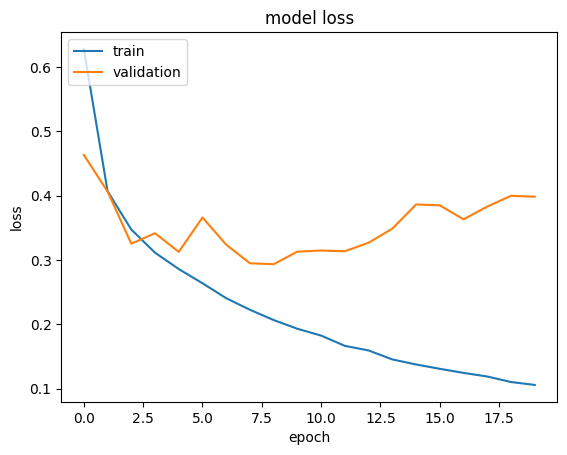

In [25]:
import matplotlib.pyplot as plt
#list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
predictions=np.argmax(predictions,axis=1)

657/657 [==============================] - 1s 2ms/step


In [28]:
from sklearn import metrics
Precision =  metrics.precision_score(y_test,predictions,
                                           average='weighted' )
print("precision: ",Precision)
Sensitivity_recall = metrics.recall_score(y_test, predictions,
                                           average='weighted')
print("sensivity: ",Sensitivity_recall)
Specificity = metrics.recall_score(y_test, predictions,
                                           average='weighted')
print("specifity: ",Specificity)
F1_score = metrics.f1_score(y_test, predictions,
                                           average='weighted')
print("F1-score: ",F1_score)

precision:  0.8975171861230051
sensivity:  0.8976190476190476
specifity:  0.8976190476190476
F1-score:  0.897179328276144


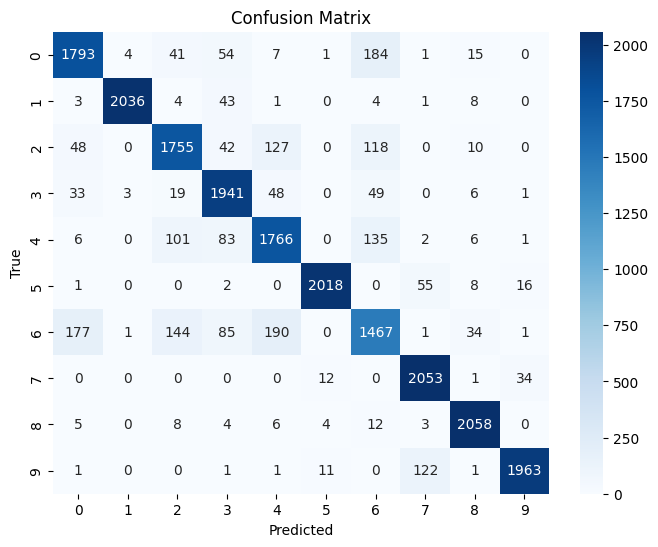

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()